In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('data/train.csv')
dev_df = pd.read_csv('data/dev.csv')

combined_df = pd.concat([train_df, dev_df])

train_split, test_split = train_test_split(
    combined_df, 
    test_size=0.2, 
    stratify=combined_df['binary-label'], 
    random_state=42
)

print("Training set distribution:\n", train_split['binary-label'].value_counts(normalize=True))
print("Test set distribution:\n", test_split['binary-label'].value_counts(normalize=True))

train_split.to_csv('data/output_train_split.csv', index=False)
test_split.to_csv('data/output_test_split.csv', index=False)

Training set distribution:
 binary-label
0.0    0.603241
1.0    0.396759
Name: proportion, dtype: float64
Test set distribution:
 binary-label
0.0    0.603038
1.0    0.396962
Name: proportion, dtype: float64


In [3]:
len(train_split)

7899

In [4]:
len(test_split)

1975

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'dev')

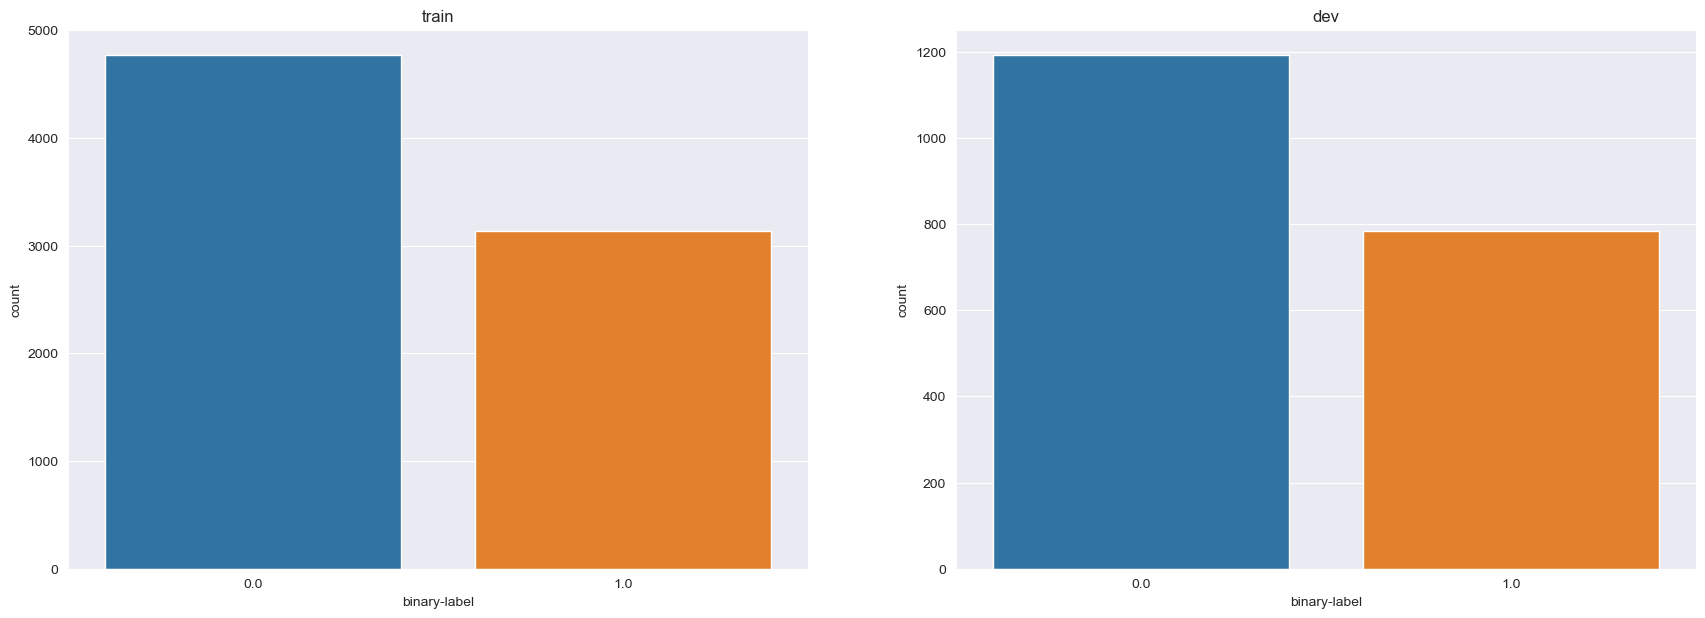

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(21,7))
sns.countplot(x='binary-label', data = train_split, ax=axes[0])
sns.countplot(x='binary-label', data = test_split, ax=axes[1])
axes[0].set_title("train")
axes[1].set_title("dev")

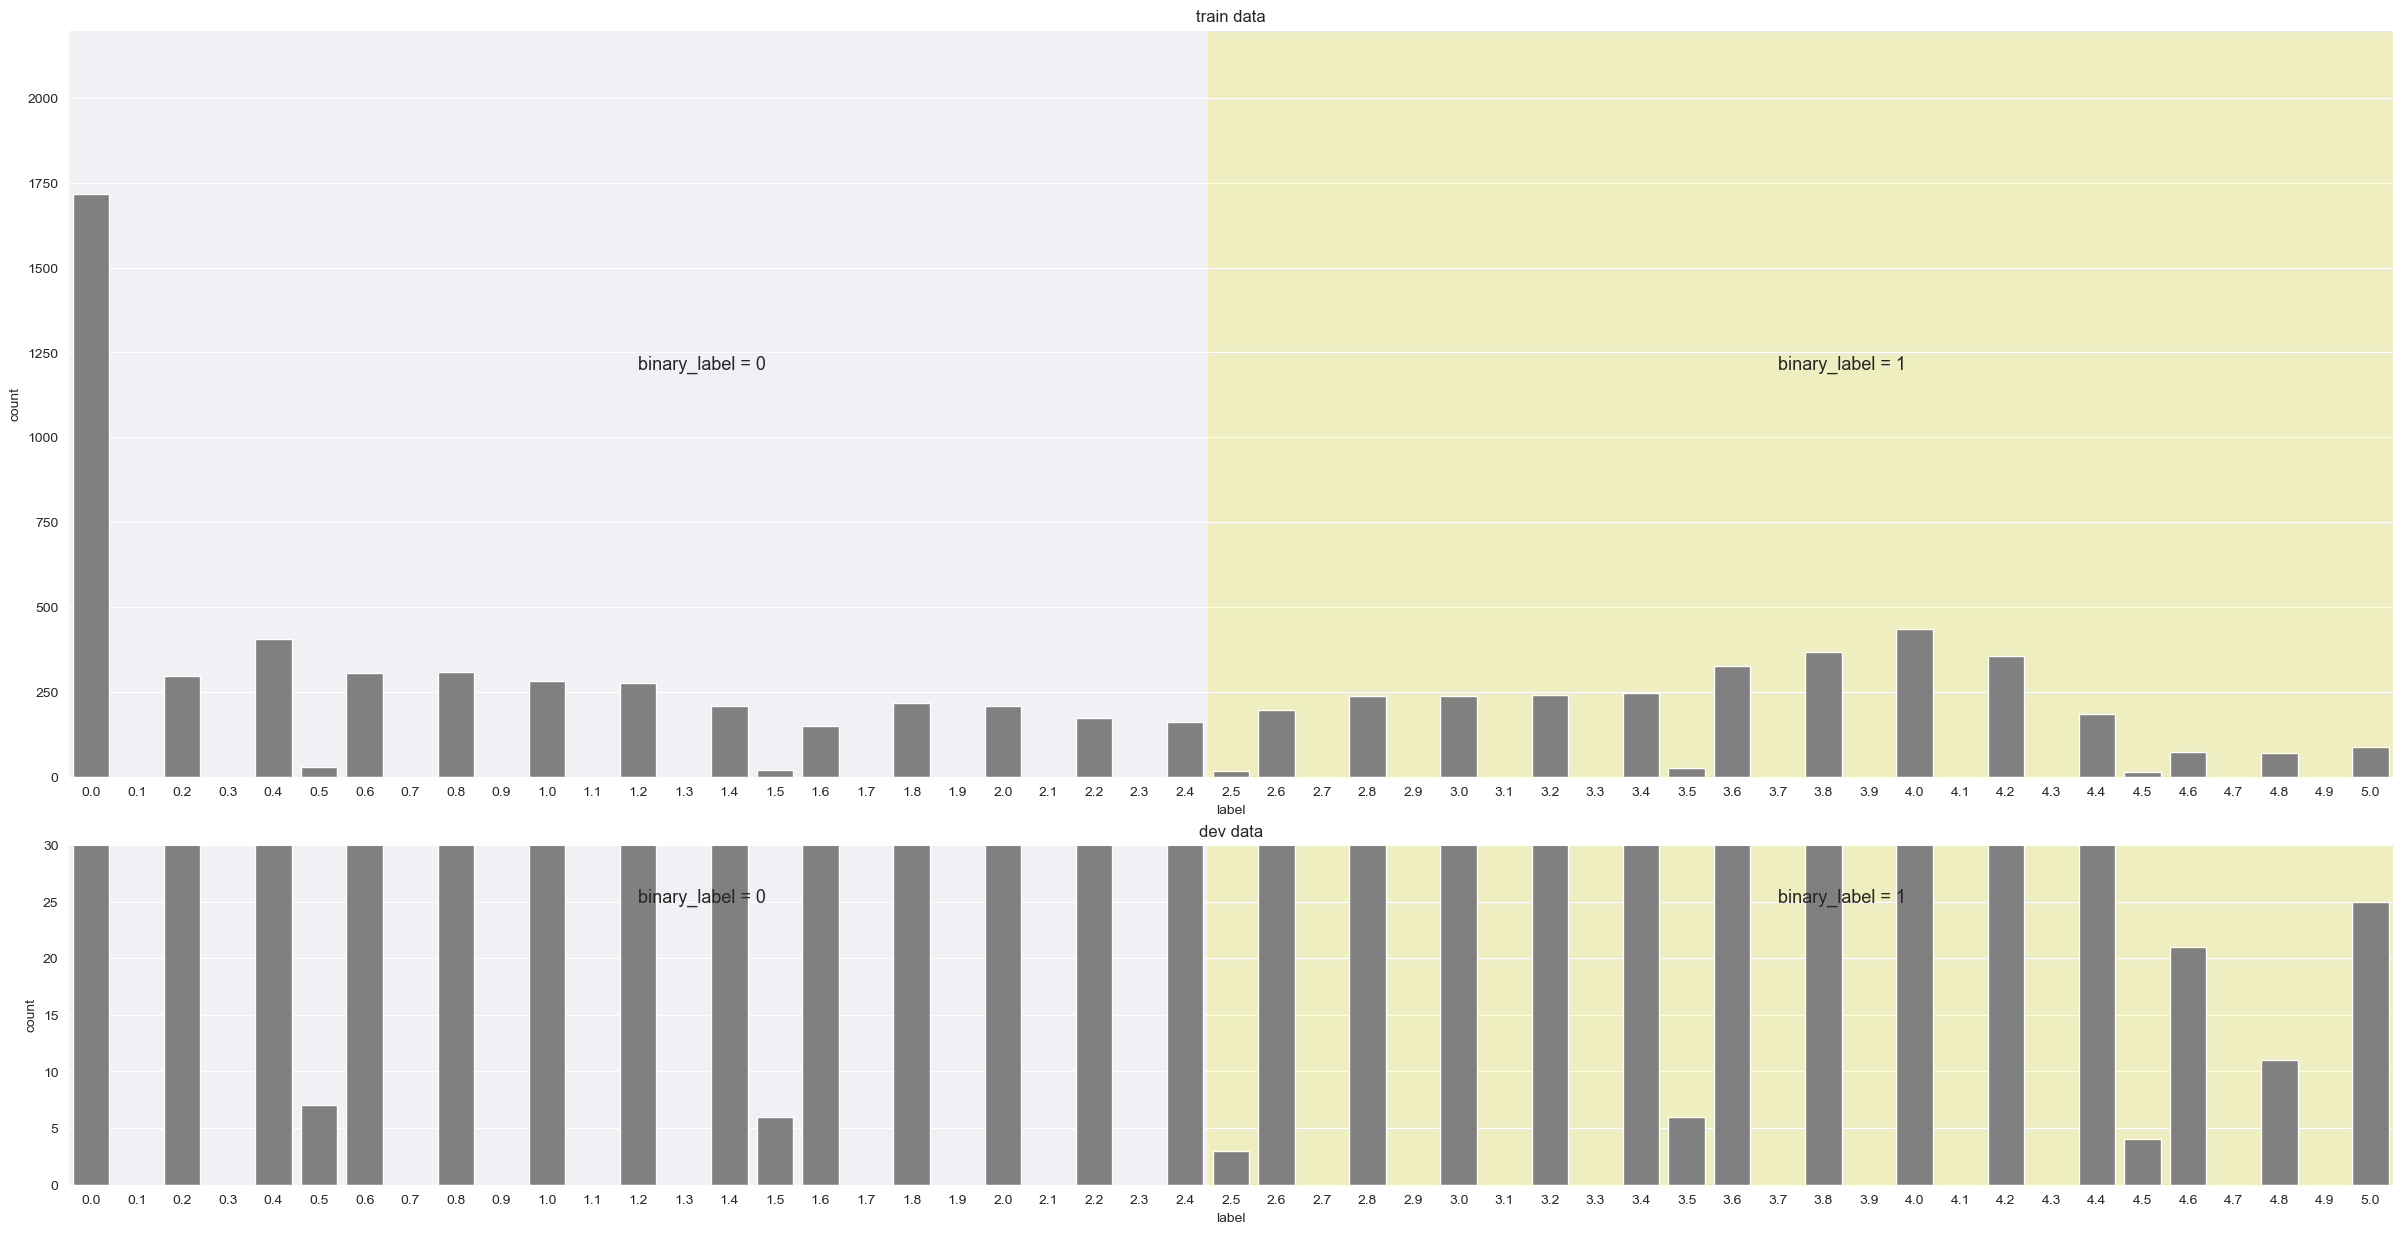

In [7]:
fig = plt.figure(figsize=(30, 15))
gs = fig.add_gridspec(3, 1) # make 3 by 3 grid (row, col)
axes = [None for _ in range(2)]

axes[0] = fig.add_subplot(gs[0:2,0])
axes[0].set_title('train data')
axes[1] = fig.add_subplot(gs[2,0])
axes[1].set_title('dev data')

for ax in axes:
  ax.axvspan(-3, 24.5, color='white', zorder=0, alpha=0.3)
  ax.axvspan(53, 24.5, color='yellow', zorder=0, alpha=0.2)

sns.countplot(x='label', data=train_split, ax=axes[0], order = map(lambda x:round(x,1), np.arange(0, 5.1, 0.1)), color="gray")
axes[0].set_ylim(0,2200)
axes[0].text(x=12, y=1200, s="binary_label = 0", fontsize=13)
axes[0].text(x=37, y=1200, s="binary_label = 1", fontsize=13)

sns.countplot(x='label', data=test_split, ax=axes[1], order = map(lambda x:round(x,1), np.arange(0, 5.1, 0.1)) ,color="gray")
axes[1].set_ylim(0,30)
axes[1].text(x=12, y=25, s="binary_label = 0", fontsize=13)
axes[1].text(x=37, y=25, s="binary_label = 1", fontsize=13)

plt.show()